In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

HTML('''<!-- <script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form> -->
<style>
.rendered_html table, .rendered_html td, .rendered_html th {
    font-size: 11pt;
    background-color: #ffffff;
    text-align: left;
}
</style>''')

<style>
td {
  font-size: 20px
}
</style>

### Tom Wilkinson's
# Cartolan - Trade Winds
***Venti, Vendi, Vici***
## Game guide, tips, and simulation playtesting

This notebook will document the rules of the boardgame Cartolan, and run simulations of it to playtest at a larger scale than possible with volunteers.

In Cartolan, it is the age of exploration, an age of sails and trails and wonders from the far side of the world. Race along established trade routes, amassing goods, and then set out into the unknown and see what new treasures you can discover and bring back successfully to the Capital. Perhaps you'll be the first to discover the Mythical City on the far side of the world, or to earn your place in history by completing the Mappa Mundi, or simply to secure your legacy by winning the lucrative Carta Mundi. But, always remember, there are rivals for your glory, and they may not be above a little piracy!

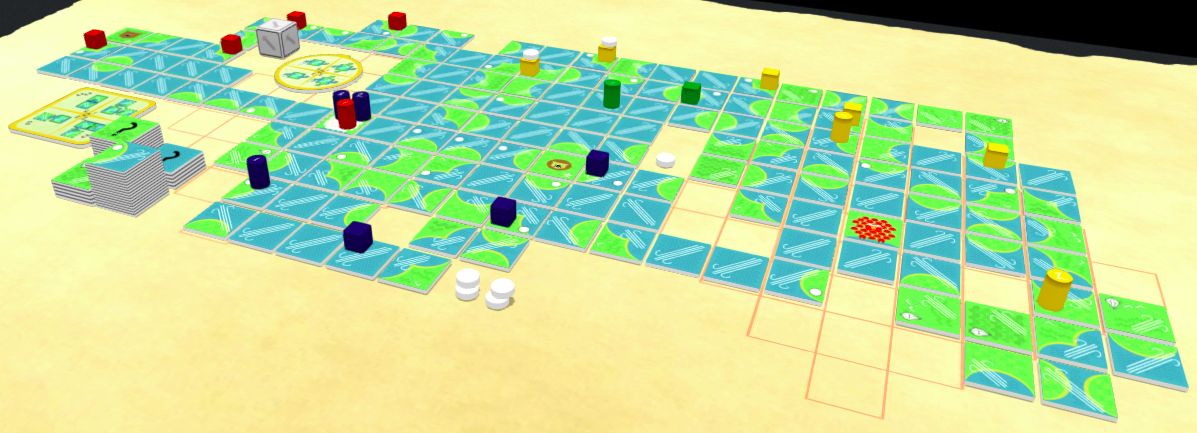

## Contents of this guide / structure of the investigation:
1. [Game items (and class templates)](#-1.-Game-items)
2. [Quick references (and method definitions)](#-2.-Quick-references-and-method-definitions)
     1. [Beginner mode - exploration and trade by sea](##-Beginner-mode---Exploration-and-Trade-by-sea)
     2. Regular mode - inland exploration, and piracy
     3. Advanced mode - special skills, sicknesses and seasons
3. [Setup before play (and instantiation of game objects)](#-3.-Setup-before-play-and-instantiation-of-objects)
4. Detailed instructions for play (and procedural structure of game)
5. Tips from human play and an exploration of simulated strategies
     1. Human discovered tips and playing the game
     2. Basic simulation of edge case strategies testing the diversity of gameplay
     3. Interactive simulation
     4. Mainstream AI players
     5. Brainstream AI players (RHMN-SORN)

# 1. Game items

The game itself involves up to four players, each of which can have various pieces which are placed on tiles around the play area, and can take actions that lead to movement of those pieces or more tiles being drawn from tile piles and placed around the play area.

Detailed below there are three different modes for the game, with successively more rules: Beginner, Regular, and Advanced.

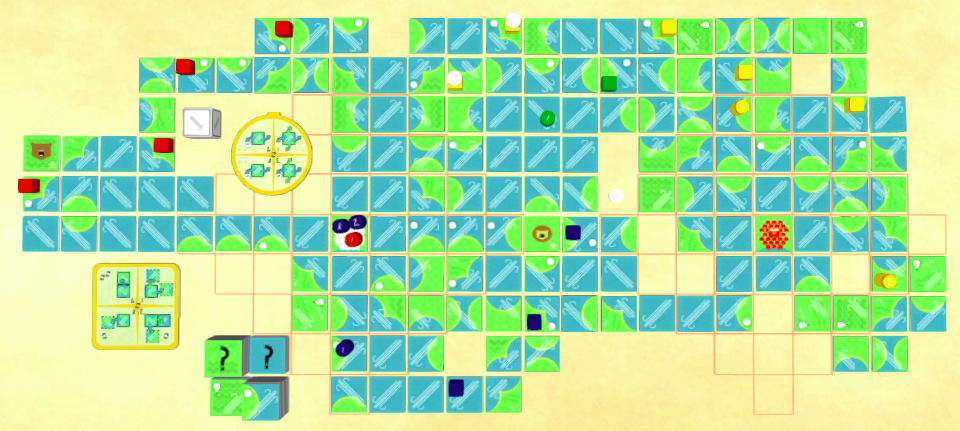

In [2]:
import base

base.Game??

## Items per player / colour

### Player and player mat (x1)

There can be between two and four players per game, and each one can hold wealth tokens in their Vault which determine who wins the game, as well as having Adventurer and Agent tokens which can each hold wealth tokens themselves.

In [3]:
base.Player?

<table><tr><td>
<h3>Adventurer tokens (x3)</h3>

These cylindrical numbered tokens are the moveable pieces for each player, with different movement possible between tiles over water edges with or against the wind, or over land edges - whether onto existing tiles or exploring new spaces. Each one can collect wealth, in its Chest, through discovering Wonders and trading at discovered wonders. In game modes besides Beginner, they can also act as pirates attacking other tokens:
</td><td>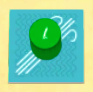
</td></tr></table>
<!-- 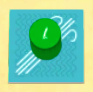 -->

In [4]:
base.Token??
base.Adventurer??

<table><tr><td>
<h3>Agent tokens (x5)</h3>

These cubic tokens, which are plain on five sides and marked on the sixth with a skull'n'crossbones, can be placed in a fixed position during the game, where they will help Adventurers perform various actions like collecting extra wealth from trade or resting:
</td><td>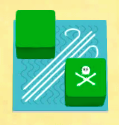
</td></tr></table>
<!-- 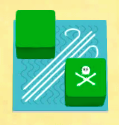 -->

In [5]:
base.Agent??

## Items shared by all players

<!-- 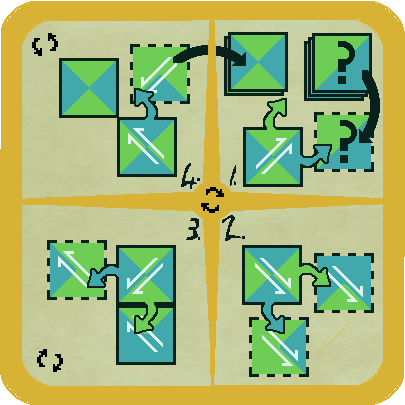 -->
<!-- 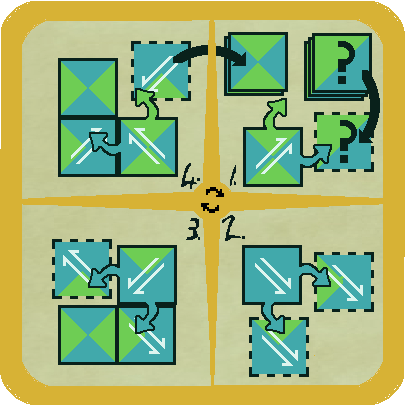 -->
<table><tr>
<td>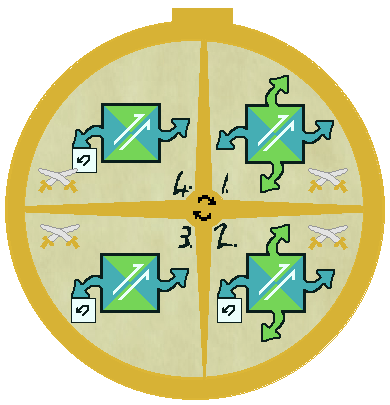</td>
<td><h3> Movement compass (x1) </h3>
This large circular tile contains visuals to remind players of how tokens can move during a turn or after resting. They do not play any other roles in gameplay and so are not worth simulating.

<h3> Exploration compass (x2) </h3>
This large square tile contains visuals to remind players of how tiles are rotated during exploration - for which there are currently **two variants** being tested. They do not play any other roles in gameplay and so are not worth simulating.</td>
<td>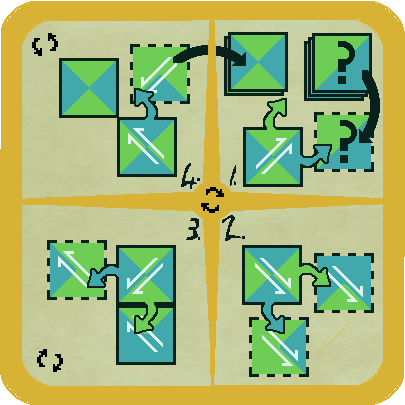</td>
<td>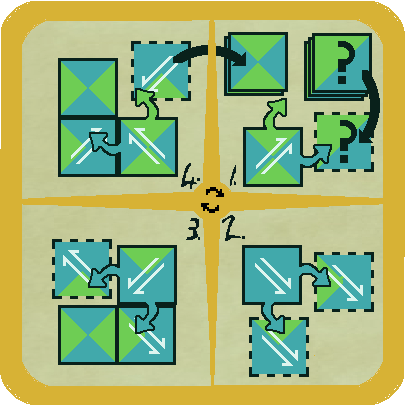</td>
</tr></table>

<table><tr><td colspan="3">
<h3> Conflict guide (x1) </h3>
This sheet contains visuals to remind players of how different conflicts resolve. They do not play any other roles in gameplay and so are not worth simulating. 

<h3> Pirate token (x12) </h3>
These black disc tokens, with skull'n'crossbones on both sides, are moved around with an Adventurer token once they have committed piracy, to represent the fact they have abandoned all but essential gear to aid movement at the expense of being able to present themselves in a civilised manner for trading. They do any other roles in gameplay and so are not worth simulating.
<!-- 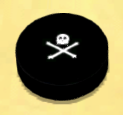 -->

<h3> Small wealth token (x50) </h3>
These many white discs each represent 1 wealth point, and would be used in the physical game to keep track of wealth collected in Adventurer's Chests, on top of Agents and Disaster tiles, and in each Player's Vault. They do not play any other roles in gameplay and so are not worth simulating. 
<!-- 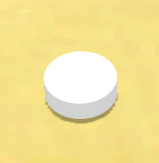 -->

<h3> Big wealth token (x50) </h3>
These many white squares each represent 5 wealth points, and would be used in the physical game to keep track of wealth collected in Adventurer's Chests, on top of Agents and Disaster tiles, and in each Player's Vault. They do not play any other roles in gameplay and so are not worth simulating.
</td>
<!-- ![cartography2_rules_conflict_guide.png](attachment:cartography2_rules_conflict_guide.png) -->
<!-- <td colspan = "1"><img src="attachment:cartography2_rules_conflict_guide.png" style="width: 800px;"/></td> -->
</tr>
<tr><td>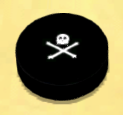</td><td>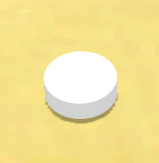</td> </tr></table>


## Tiles
The game takes place across square tiles that have been laid next to one another in a grid, drawn from tile piles, and which determine what actions players' tokens can take each movement and how they earn wealth. Each tile will have four edges that can be either water or land, and an arrow denoting wind direction diagonally across them. On the back of the tile there will be either land or water. Only water-backed tiles are used in Beginner mode. Tiles may also have a pearl/diamond denoting a Wonder on that tile or a skull'n'crossbones denoting a disaster.
<!-- ![Unknown%20tiles.png](attachment:Unknown%20tiles.png)  ![example_tile_land_mountains_wonder.png](attachment:example_tile_land_mountains_wonder.png)  ![example_tile_water_ucda_land_uadc.png](attachment:example_tile_water_ucda_land_uadc.png) -->
<!-- <table><tr><td><img src='attachment:Unknown%20tiles.png' style="width: 150px;"></td><td><img src='attachment:example_tile_land_mountains_wonder.png' style="width: 75px;"></td><td><img src='attachment:example_tile_water_ucda_land_uadc.png' style="width: 75px;"></td></tr></table> -->

In [6]:
base.TilePosition??
base.WindDirection??
base.TileEdges??
base.Tile??
base.TilePile??

### Water tiles
These tiles will tend to have more water edges, and can include Wonders that give wealth for discovery or trade, encouraging play balancing speed of travel with the time interval before banking wealth in a player's Vault.
<!-- ![Unexplored%20tile%20-%20water.png](attachment:Unexplored%20tile%20-%20water.png) -->
<table><tr>
<td>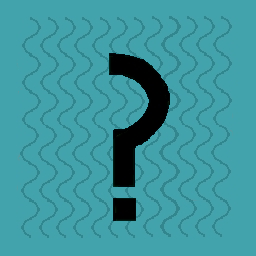</td>
<td>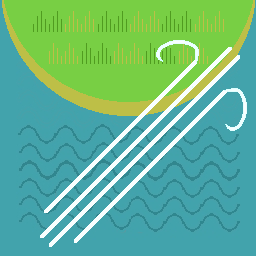</td>
<td>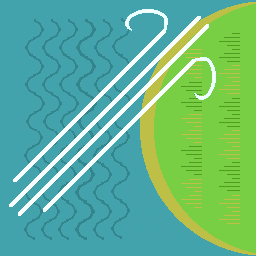</td>
<td>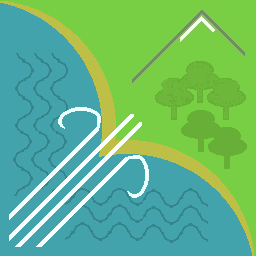</td>
<td>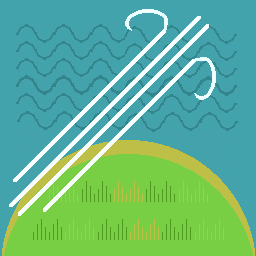</td>
<td>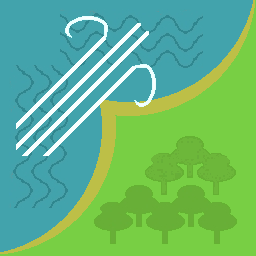</td>
<td>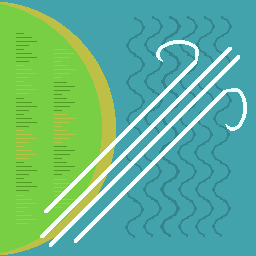</td>
<td>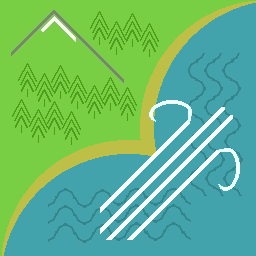</td>
<td>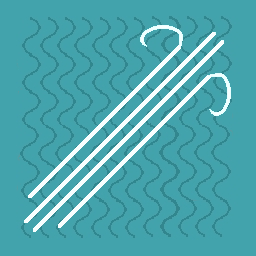</td>
</tr><tr>
<td style="text-align: center;">Tile back</td>
<td style="text-align: center;">x 2</td>
<td style="text-align: center;">x 2</td>
<td style="text-align: center;">x 1</td>
<td style="text-align: center;">x 10</td>
<td style="text-align: center;">x 10</td>
<td style="text-align: center;">x 10</td>
<td style="text-align: center;">x 10</td>
<td style="text-align: center;">x 15 + 8</td>
</tr><tr>
<td></td>
<td></td>
<td></td>
<td></td>
<td>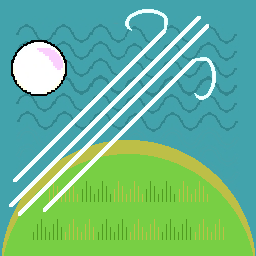</td>
<td>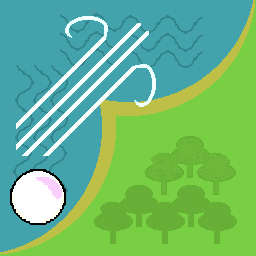</td>
<td>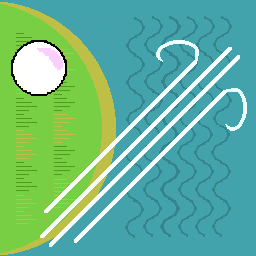</td>
<td>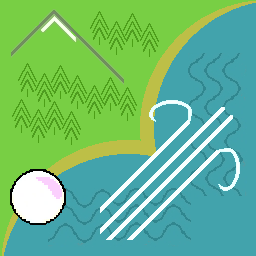</td>
<td>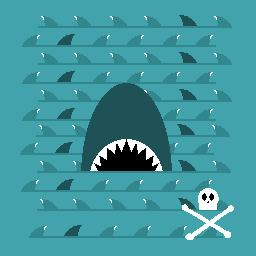</td>
</tr><tr>
<td></td>
<td></td>
<td></td>
<td></td>
<td style="text-align: center;">x 3</td>
<td style="text-align: center;">x 3</td>
<td style="text-align: center;">x 3</td>
<td style="text-align: center;">x 3</td>
<td style="text-align: center;">x 1 (Regular mode)</td>
</tr></table>

<!-- ![tttft.png](attachment:tttft.png)![ttftt.png](attachment:ttftt.png)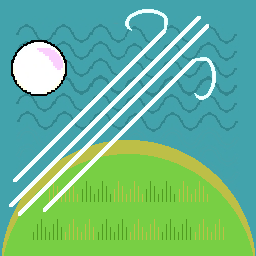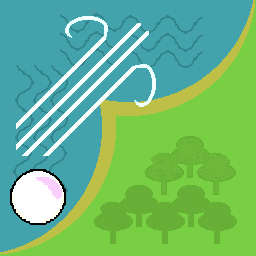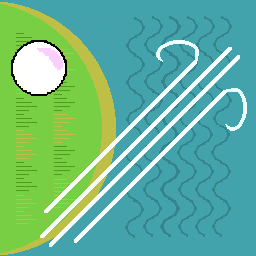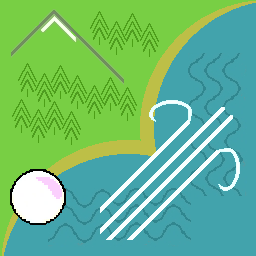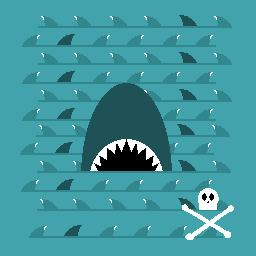 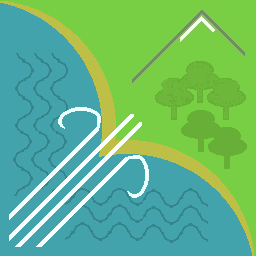!![ttfft.png](attachment:ttfft.png)! -->

In [7]:
base.WaterTile??

### Land tiles
These tiles will tend to have more land edges and can include both Wonders, that give wealth for discovery or trade, and Disasters, that remove all wealth from an Adventurer, encouraging play balancing risk against greater reward. 
<!-- ![Unexplored%20tile%20-%20land.png](attachment:Unexplored%20tile%20-%20land.png) -->
<!-- <img src="attachment:Unexplored%20tile%20-%20land.png" style="width: 100px;"> -->
<table><tr>
<td>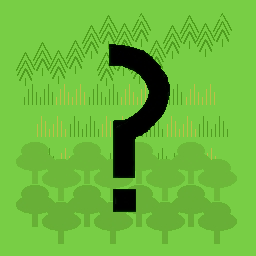</td>
<td>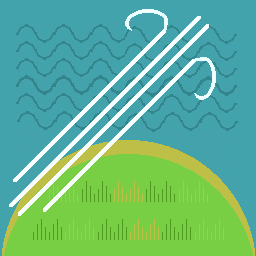</td>
<td>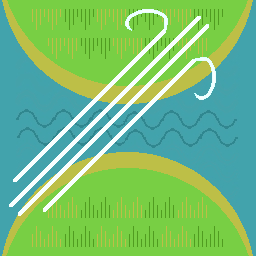</td>
<td>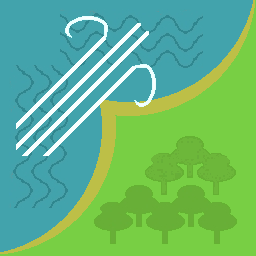</td>
<td>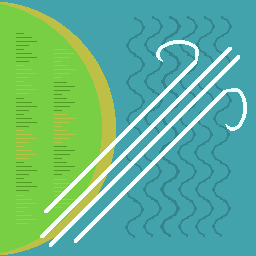</td>
<td>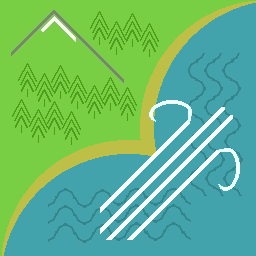</td>
<td>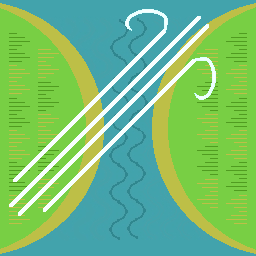</td>
<td>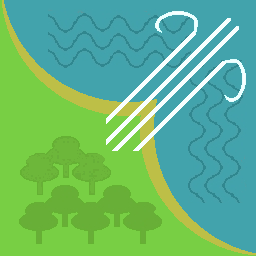</td>
<td>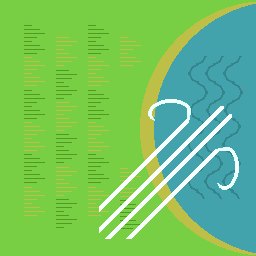</td>
<td>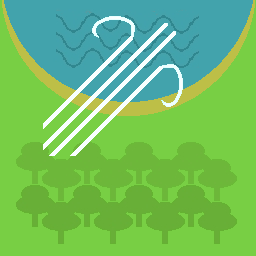</td>
<td>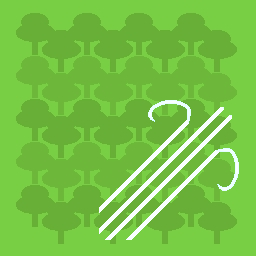</td>
</tr><tr>
<td style="text-align: center;">Tile back</td>
<td style="text-align: center;">x 2</td>
<td style="text-align: center;">x 3</td>
<td style="text-align: center;">x 2</td>
<td style="text-align: center;">x 2</td>
<td style="text-align: center;">x 2</td>
<td style="text-align: center;">x 3</td>
<td style="text-align: center;">x 4</td>
<td style="text-align: center;">x 4</td>
<td style="text-align: center;">x 4</td>
<td style="text-align: center;">x 6</td>
</tr><tr>
<td></td>
<td>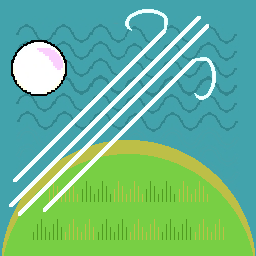</td>
<td>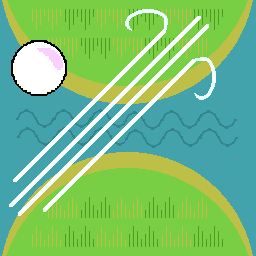</td>
<td>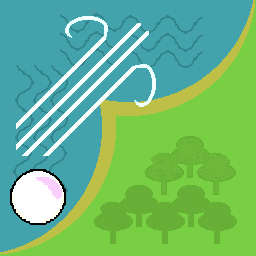</td>
<td>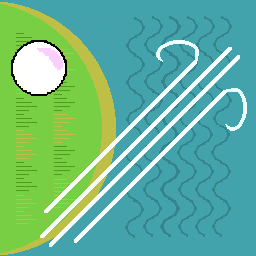</td>
<td>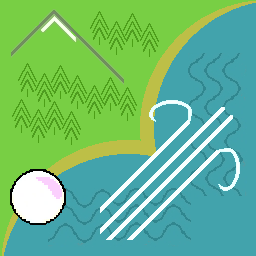</td>
<td>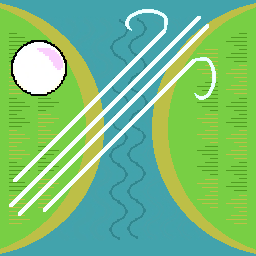</td>
<td>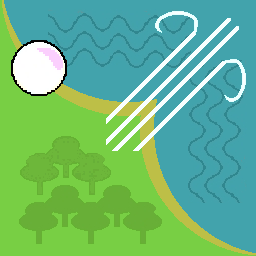</td>
<td>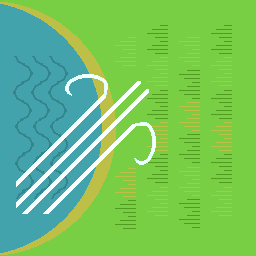</td>
<td>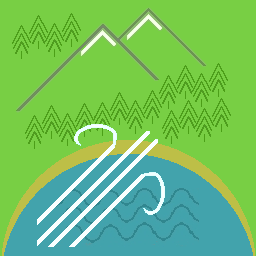</td>
<td>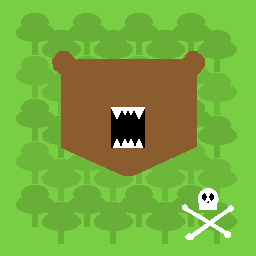</td>
</tr><tr>
<td></td>
<td style="text-align: center;">x 1</td>
<td style="text-align: center;">x 1</td>
<td style="text-align: center;">x 1</td>
<td style="text-align: center;">x 1</td>
<td style="text-align: center;">x 1</td>
<td style="text-align: center;">x 1</td>
<td style="text-align: center;">x 2</td>
<td style="text-align: center;">x 4</td>
<td style="text-align: center;">x 4</td>
<td style="text-align: center;">x 1</td>
</tr></table>

<!-- 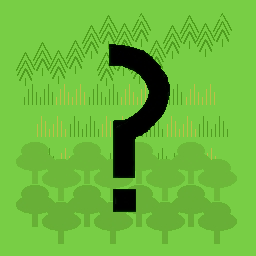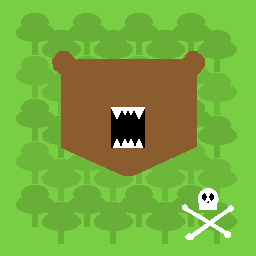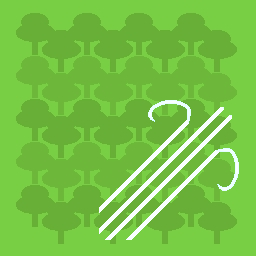![fffft.png](attachment:fffft.png)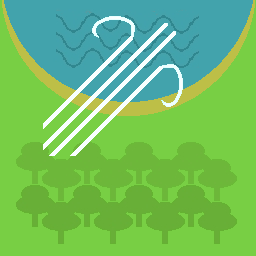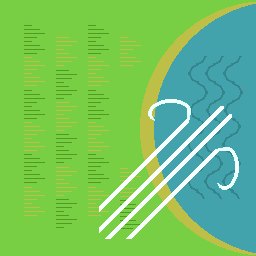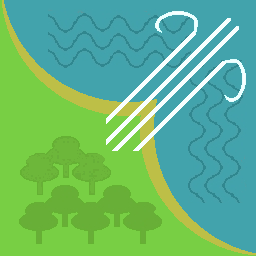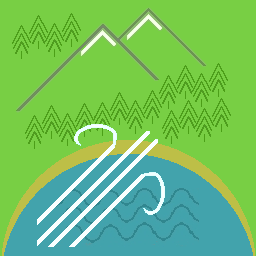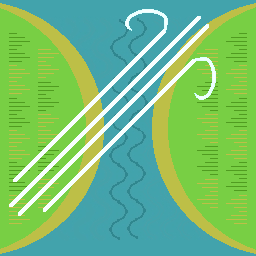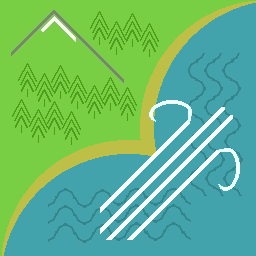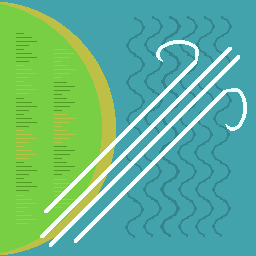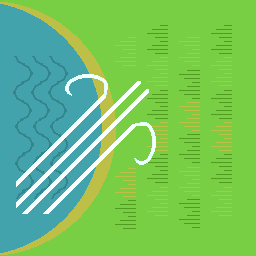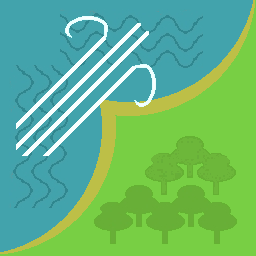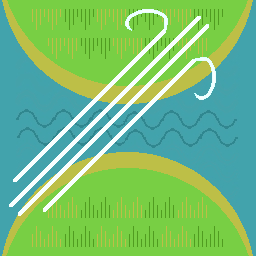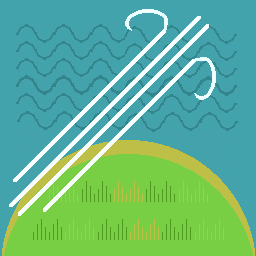!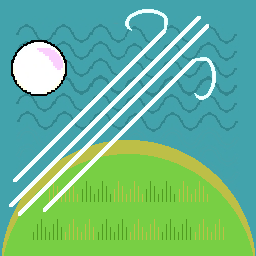!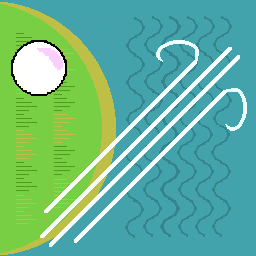!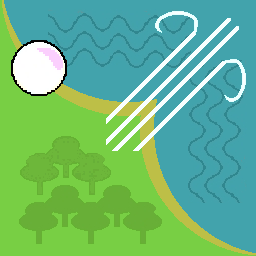!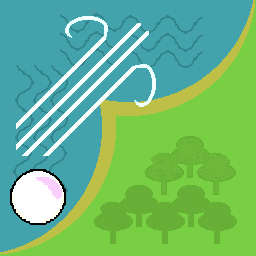!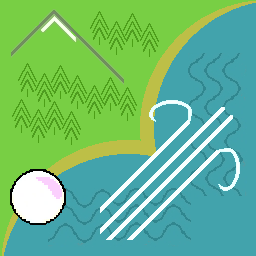!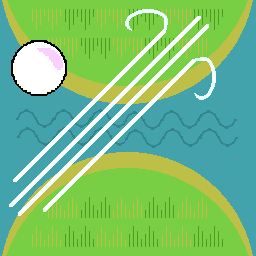!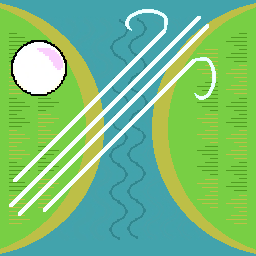! -->

In [8]:
base.LandTile??

<table><tr>
<td>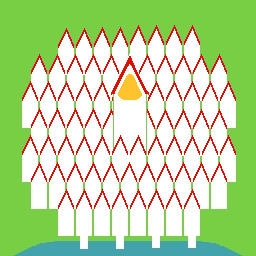</td>
<td><h3> City tiles - The Capital and The Mythical City</h3>
These tiles allow players to move wealth from an Adventurer's Chest to the Player's Vault, as well as investing wealth in more Adventurers or Agents. You can move in any direction from these tiles as if every edge was land.</td>
<td>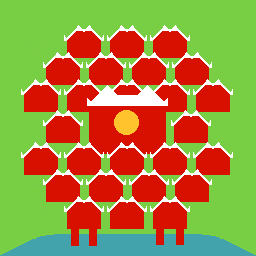</td>
</tr></table>
<!-- <table><tr><td><img src="attachment:Tiles%20-%20Capital.png" style="width: 100px;"></td><td><img src="attachment:Tiles%20-%20Mythical%20City.png" style="width: 100px;"></td></tr></table> -->
<!-- ![Tiles%20-%20Capital.png](attachment:Tiles%20-%20Capital.png)![Tiles%20-%20Mythical%20City.png](attachment:Tiles%20-%20Mythical%20City.png)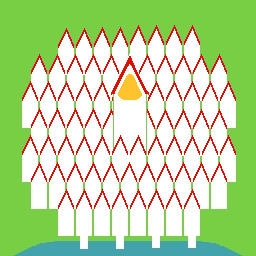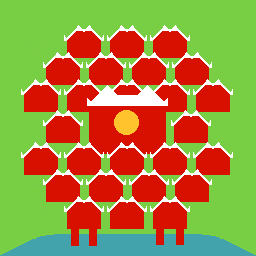 -->

<table><tr>
<td>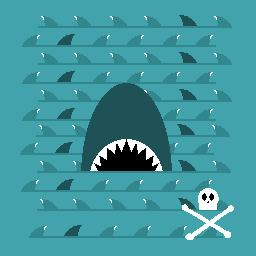</td>
<td><h3> Disaster tiles</h3>
When discovered, these tiles send the Adventurer back to the last city they visited with all the wealth from their Chest taken and left on the Disaster tile..</td>
<td>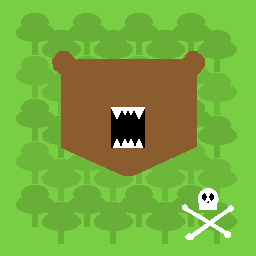</td>
</tr><tr>
<td style="text-align: center;">x 1</td>
<td></td>
<td style="text-align: center;">x 1</td>
</tr></table>
<!-- <table><tr><td><img src="attachment:Tiles%20-%20Capital.png" style="width: 100px;"></td><td><img src="attachment:Tiles%20-%20Mythical%20City.png" style="width: 100px;"></td></tr></table> -->
<!-- 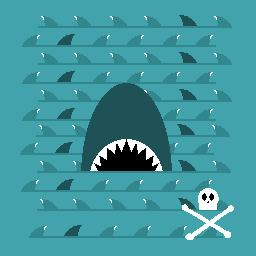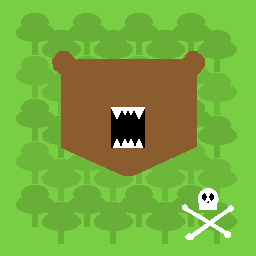 -->

In [9]:
base.CityTile??

# 2. Quick references and method definitions

## Beginner mode - Exploration and Trade by sea

### Adventurers and Movement
Adventurers start out at cities and can each move over up to 4 edges between tiles each turn, or after resting at an Agent during a turn. There are two possible variants for their movement:

1. **Initial only** - After their first turn, the player cannot move across a water edge (blue) against the direction of the Wind Arrow on the tile they move from. After their second move they cannot cross land edges (green).
2. **Budgetted** - Within these 4 moves, they can cross land edges (green) at most 2 times or can cross a water edge (blue) 1 time against the direction of the Wind Arrow on the tile they move from.

After a move onto another tile, or using a move to wait on the same tile, an Adventurer can trade as part of that same move. Resting at a player’s own Agents is free, but 1 wealth is left with another player’s Agent. 

If they are moving into an empty space with no tile, then [exploration](###-Adventurers-and-Exploration---placing-new-tiles) will be needed.

### Adventurers and Exploration - placing new tiles
When an Adventurer moves into an empty space, a new tile should be drawn to fill that space from the pile, and placed so that the edges match colour with all adjacent tiles. The wind direction should be matched, but if it doesn’t fit then there are two possible variants on how to try different rotations of the tile:

1. **Clockwise first** - the tile should be tried rotated clockwise, then anticlockwise.
2. **Continuous wind** - the tile should be tried rotated 90 degrees so that the wind arrow from their previous tile still flows into the base of the new arrow.

If the tile cannot fit with its surrounding tiles, or only with the arrow pointing in the opposite direction from the previous tile, then it is put in the discard pile and up to four more tiles tried that move.

In [10]:
import beginner

beginner.AdventurerBeginner??

### Agents
Agents can be placed on any new tile more than four tiles from a city, costing the moving Adventurer 3 wealth. If placed on a Wonder tile, an Agent will collect 1 wealth whenever a Trade takes place on that tile, collected by the player’s next visiting Adventurer. An Agent is dispossessed if an opponent’s Adventurer successfully attacks it, awarding them all the wealth it was holding plus 1. An Agent is restored by its own player’s Adventurer visiting and paying 1 wealth.

In [11]:
beginner.AgentBeginner??

### Cities (Capital and Mythical): 
Arriving at a city ends an Adventurer's turn. Within four moves of a city in any direction*s*, Agents cannot be placed and discovering new Wonders gives no wealth. When finishing a move in a city you can move wealth from an Adventurer’s Chest into the player’s Vault, and buy another Adventurer for 10 wealth. You can also place an Agent on any tile that doesn’t have an active Agent or an opponent’s Adventurer for 5 wealth, or where you have an Adventurer for 3 wealth. Victory is awarded to the player with the most wealth in their Vault, either when one player is more than 25 ahead, or when one colour of tile runs out.

In [12]:
beginner.CityTileBeginner??

### Wonders
When turned over these tiles grant 5 wealth to the Adventurer. Subsequent visits will grant 2 wealth from Trade, but only once for each Adventurer between visits to a city.

## Regular mode - inland exploration and piracy

### Adventurers and Attacking - Piracy and Arrest
An Adventurer can attack another (non-pirate) Adventurer or Agent immediately on the tile where they finish a move. They become a pirate, then carrying the Pirate token. Until they visit a city, they cannot trade, or rest at other players’ Agents, but they can move onto and off Disaster tiles as if all the edges were land. When an Adventurer attacks another player, or tries to arrest a pirate on the same tile, they only succeed if two rolls of the die don’t match. Successful attack against an Adventurer takes half their wealth, against an Agent takes all their wealth plus one, and against a pirate removes all their wealth, returns them to their last city and awards 5 wealth to the arrester’s Vault.

### Adventurers and Inland exploration
Unlike beginner mode, when an Adventurer moves over a tile edge into an empty space, a new tile should be drawn from the pile of the same colour as that edge. When one of these tiles has Wonder, the player turning it over is rewarded with 10 wealth.

### Adventurers and upwind movement
After their allotted upwind moves, the player may roll a gust against the prevailing wind on the die in order to move across a water edge upwind.

In [13]:
from beginner import AdventurerBeginner, AgentBeginner, CityTileBeginner
import regular

regular.AdventurerRegular??

### Agents and dispossession
Agents can be attacked, and if successful the attacker is awarded all the Agent's wealth plus 1 to their chest. When attacked Agents are dispossessed, which prevents them from giving rest to Adventurers or collecting wealth from trade on their tile. They can be restored by visiting Adventurers for 1 wealth. 

In [14]:
regular.AgentRegular??

### Disaster tiles
When first turned over these tiles send the moving Adventurer back to the Capital. All the wealth from their Chest is left on the tile. Half this wealth at a time can then be recovered by visiting pirates as if being attacked by the disaster.

In [15]:
regular.DisasterTile??

## Advanced mode - special skills, sicknesses, and seasons

### Expanded city domains
Cities’ Domains now extend for five tiles away from the city tile.

### Special skills
Technologies and named Adventurers: when an adventurer is added to the game, a random card is drawn from the Named Adventurers deck, and placed on top of the correspondingly numbered Chest on the player’s mat. The named Adventurer card confers on that Adventurer the changes to play moves described on the card and in the appendix below. When a Wonder is first discovered outside any city’s waters, instead of collecting wealth an Technology card can be drawn from the Discovery deck. At the end of a turn a different Technology card can be equipped by each Adventurer, conferring from the next turn the changes to their movement rules as described on the card and in the appendix.

### Sickness
When drawn from the Discovery deck, the Sickness card immediately dispossesses every Agent visited by that Adventurer since last visiting a city, sends that Adventurer back to that city without their Chest wealth, and halves the Vault wealth of all players.

### Seasons
When drawn from the Discovery deck, Season cards immediately cause the direction to be reversed on the four tiles surrounding each city.

### Adventurers - unburdened movement
If an Adventurer’s Chest is empty, then they move up to three times across land edges (green) between tiles, or up to twice over water edges (blue) against the direction of the wind arrow on the tile they move from, since starting their turn or resting.

In [16]:
from regular import AdventurerRegular, AgentRegular, DisasterTile
import advanced

advanced.AdventurerAdvanced??

# 3. Setup before play

<table><tr>
<td>
<h3> 1. The Capital tile is placed </h3>
The Capital tile is placed, and a plain water tile on every side of it. It is recommended that the prevailing wind should point towards the North-East on all these tiles.

<h3> 2. Each player places an Adventurer token on the Capital tile </h3>
Each player places an Adventurer token on the Capital tile, or if they want a faster,  more unpredictable, game all can also place a second.

<h3> 3. A pile of Water Tiles is drawn</h3>
A shared pile of water tiles is randomly drawn, with 30 tiles for each player.

<h3> 4. A pile of Land Tiles is drawn</h3>
For Regular or Advanced mode, a shared pile of land tiles is randomly drawn, with 15 tiles for each player.

<h3> 5. Select the starting player</h3>
Starting with the youngest, players each roll the Gusting Wind die until someone gets a gust against the prevailing wind roll, which selects them as the starting player.
</td>
<td>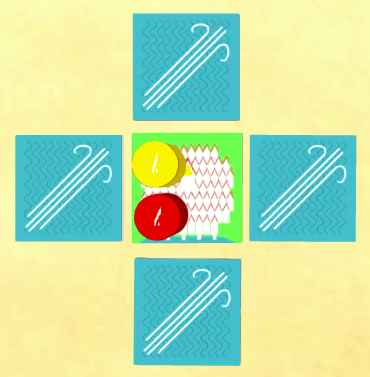</td>
</tr></table>

## Game rules
Starting with the youngest, players take it in turn to roll the Gusting Wind Die, until one rolls a gust against the prevailing wind. They become the first player, and play proceeds clockwise from them until either one player has 25 more wealth in their Vault than any other, or one colour of tile (water/land) has been exhausted from both the main and discard piles.

The current player chooses an Adventurer that hasn't moved yet, and play then proceeds according to the sequence:

### Movement
A direction is chosen for the moving Adventurer, and if they are able to move over that edge of their current tile according to the movement rules outlined above then they do so. 

### Exploration
If the moving Adventurer moves over an edge into a space that has no tile, then a tile is drawn from the top of the tile  pile with an edge corresponding to the edge that was moved over - that is, either a water-backed tile for a water edge or a land-backed tile for a land edge. 

The tile is initially tried with its wind direction matching the tile that was moved from. If its edges don't match the adjacent tiles, so that water adjoins water and land adjoins land, then it is rotated and tried again according to the rules above. If after all the rotations in the rules are tried it doesn't fit with the adjacent tiles, then the tile goes in the discard pile. Another tile is drawn and tried, until 5 have been tried and then the move ends and the Player returns to the movement phase for this Adventurer. 

If the suitable tile pile is empty then the discard pile is shuffled and used to replace it. If the discard pile is also empty then the game is over and **the player with the most wealth in their vault wins**.

### Actions - Discovery, Trading, Buying, and Piracy
If the Adventurer has moved onto a newly placed Wonder tile (with a pearl or a diamond marked on it), more than four tiles from any city, then they have discovered this wonder and get a wealth bonus. If the Wonder tile had previously been placed, or is within the domain of a city, then they can trade in the Wonder for a reduced amount of wealth.

If a newly placed tile is outside any city's domain, more than four tiles away from it, then the Player can pay to place an Agent, which will collect a bonus when trade happens on this tile, and will refresh the move counts of Adventurers that visit (and pay a fee if they belong to another player). An Agent can also be hired by a player when their Adventurer is at a city, and placed on any tile with no active Agent for a slightly higher cost. More Adventurers can also be hired instead, and they are then able to move that same turn.

When an Adventurer lands on the same tile as another Adventurer or an Agent, they can choose to attack it. Unless they are attacking a pirate they become a pirate themselves. Successfully attacking an (non-pirate) Adventurer takes half their wealth, successfully attacking an Agent takes all their wealth plus one, and successfully attacking a pirate arrests them and sends them to their last city visited with no wealth while awarding the attacker a wealth bonus. 

### Resolving conflict
Conflict is resolved by the defending player and then the attacking player rolling the die. If the rolls don't match then the attacker is successful. The attacker gets an extra attempt at attacking each move for every Adventurer more they might have on a tile, while for every Adventurer more the defender might have the attacker must win another conflict to be successful. 

### Repeating or ending the turn
If the moving Adventurer has any more valid moves from their tile at the end of the move, then they must continue to move or end their turn. When all of a player's Adventurers have had their turn then the player's turn is over and play proceeds clockwise to the next player.

If at any point one player's wealth in their Vault is ahead of all other players by the winning margin, then **they have one the game**.

In [17]:
from game import GameBeginner

game.GameBeginner??

Object `game.GameBeginner` not found.


In [18]:
from game import GameRegular

game.GameRegular??

Object `game.GameRegular` not found.


In [19]:
from game import GameAdvanced

game.GameAdvanced??

Object `game.GameAdvanced` not found.


## Visualising play

The play area is visualised in Python's pyplot, using images of the tiles from the actual artwork.

The paths players have moved along are shown with increasing thickness over time. Attacks are marked with crosses, which are hollow when unsuccessful and filled when successful.

In [20]:
from visuals import PlayAreaVisualisation, PlayStatsVisualisation

visuals.PlayAreaVisualisation??

visuals.PlayStatsVisualisation??

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Object `visuals.PlayAreaVisualisation` not found.
Object `visuals.PlayStatsVisualisation` not found.


# 5. Tips for Human players and simulating simple strategies
The tips below were derived either from the logical design of the game, or from human playtesting.

## Human discovered tips and playable game

### Tip 1 - Exploration and placing Agents
Your Adventurers get tired over the course of a turn, so the route you choose for them matters, even if different routes end in the same place. As you're exploring, plan how you might repeat lucrative sections of your current route from the Capital, and place Agents where they'll refresh your Adventurers' move counts to create fast trade routes. Placing an Agent on an Adventurer's third move exploring can refresh them on their fourth and accelerate their return home, but this style of fast exploring is less lucrative than trading.

### Tip 2 - Beware the prevailing wind
It’s easy to travel with the prevailing wind, but hard to go against it. You may have to travel for many more moves before the prevailing wind direction swings around to take you back to the Capital quickly. So, explore closer to the Capital if you can, rather than racing to the horizon, and especially if an opponent is likely to quickly add a lot of wealth to their Vault.

### Tip 3 - Keep exploring but return to the Capital often
Steadily exploring the unknown off the edges of the map is more lucrative than trading, but disaster is just around the corner and your peers may not be above piracy when you cross paths. So, return to the Capital and bank your discovered riches often, but try and traverse the known map via trade opportunities and to move more quickly via Agents. Without more exploration changing the income from trade routes, it should be the player with the fastest earning trade route that ultimately wins.

### Tip 4 - Moving on land is slow
Going backwards, to return to the water, may actually allow more exploration in a turn. On a lucrative trade route, an Agent placed before a land section could keep your Adventurer moving at a faster pace. When exploring an agent placed before land can be returned to for a longer turn.

### Tip 5 - Away from land the wind swings consistently
The prevailing wind gets disrupted unpredictably by the land, so if you want to maintain a course while exploring, it’s best to stay in open water away from coasts. The wind tends to swing clockwise anyway as you travel to the right of the prevailing wind, and anticlockwise to the left, and you can use this to change direction.

### Tip 6 - Use piracy carefully
Piracy might be necessary to stop an opponent banking a game-winning treasure haul at the Capital, or to break up a lucrative trade route. But, it has major costs: it will make you yourself an attractive target for others, while also denying you any more wealth from trading on your current expedition.

In [21]:
from players_human import PlayerHuman

players_human.PayerHuman??

Object `players_human.PayerHuman` not found.


In [22]:
# %matplotlib
# %matplotlib notebook
from matplotlib import pyplot
from matplotlib.widgets import Button, RadioButtons
import os, sys
from game import GameBeginner, GameRegular
from players_human import PlayerHuman
from cartolan import InteractiveGame

#determine logging
# sys.stdout = open(os.devnull, 'w')
sys.stdout = open("./logs/cartolan_log.txt", 'w')
# sys.stdout = sys.__stdout__



# we have to already instantiate the visualisations, or they don't appear alongside the control panel. no idea why
# interactive_game = InteractiveGame()
# interactive_game.play_game()
# sys.stdout = stdout_backup
# control_fig = pyplot.figure(num = "Play Controls", figsize = (11,1))
# #include radio button to select game mode
# axradmode = pyplot.axes([0.05, 0.2, 0.1, 0.4])
# radmode = RadioButtons(axradmode, interactive_game.GAME_MODES.keys())
# radmode.on_clicked(interactive_game.select_mode)
# #include radio button to select movement rules
# axradmove = pyplot.axes([0.2, 0.2, 0.1, 0.4])
# radmove = RadioButtons(axradmove, interactive_game.MOVEMENT_RULES)
# radmove.on_clicked(interactive_game.select_movement)
# #include radio button to select exploration rules
# axradexpl = pyplot.axes([0.35, 0.2, 0.1, 0.4])
# radexpl = RadioButtons(axradexpl, interactive_game.EXPLORATION_RULES)
# radexpl.on_clicked(interactive_game.select_exploration)
# #include radio button to select whether the mythical city will be included
# axradmyth = pyplot.axes([0.5, 0.2, 0.1, 0.4])
# radmyth = RadioButtons(axradmyth, ["Mythical", "None"])
# radmyth.on_clicked(interactive_game.select_exploration)
# #include radio button to select number of players
# axradnump = pyplot.axes([0.65, 0.2, 0.10, 0.4])
# radnump = RadioButtons(axradnump, interactive_game.NUM_PLAYERS_OPTIONS)
# radnump.on_clicked(interactive_game.set_num_human_players)
# #include push button to run sims
# axrun = pyplot.axes([0.80, 0.2, 0.15, 0.4])
# brun = Button(axrun, 'Play Game')
# brun.on_clicked(interactive_game.click_play_game)

# pyplot.show(block=False)

## Virtual players with basic behaviours - simulating simple strategies
The virtual player types below are intended to test simple strategies at a scale that human playtesting can't match, to make sure that no single simple strategy dominates all others so that the game will stay interesting.

### Player behaviours - <font color=blue>Explorer</font>
This crude computer player will always move away from the Capital while its Chest has less than the points difference and then towards the Capital once it has collected enough wealth. If it can't move away from the Capital as desired, but can move, it will avoid the clockwise rotation of the wind, by heading downwind to the left. If instead it can't move toward the Capital as desired, but can move, it will make use of the clockwise rotation of the wind, by heading downwind to the right.

### Player behaviours - <font color=red>Trader</font>
This crude computer player will generally behave like the Explorer. But, unlike the explorer, it will establish agents whenever it discovers a wonder.

### Player behaviours - <font color=yellow>Router</font>
This crude computer player will generally behave like the Explorer. But, unlike the explorer, it will establish agents whenever it can no longer move, providing it has enough wealth.

### Player behaviours - <font color=orange>Pirate (Regular / Advanced mode)</font>
This crude computer player seeks out opponents' adventurers and agents to attack, or dropped wealth on disaster tiles, based on which of these would yield the most wealth at the time of moving.  Otherwise it behaves like the Explorer, seeking wealth until it has a game-leading amount to bank.

In [23]:
from players_heuristical import PlayerBeginnerExplorer, PlayerBeginnerRouter, PlayerBeginnerTrader

players_heuristical.PlayerBeginnerExplorer??
players_heuristical.PlayerBeginnerRouter??
players_heuristical.PlayerBeginnerTrader??

In [24]:
from players_heuristical import PlayerRegularExplorer, PlayerRegularTrader, PlayerRegularRouter, PlayerRegularPirate

players_heuristical.PlayerRegularExplorer??
players_heuristical.PlayerRegularTrader??
players_heuristical.PlayerRegularRouter??
players_heuristical.PlayerRegularPirate??

### Computer only simulations
Use the control panel below to explore different configurations of the game and the resulting play statistics.

In [ ]:
# %matplotlib notebook
# from matplotlib import pyplot
# from matplotlib.widgets import Button, RadioButtons, Slider

from cartolan import Simulations


# # create a panel with buttons/sliders to run the simulation, and select the number of simulations, borrowing from https://matplotlib.org/3.2.1/gallery/widgets/buttons.html
# simulations = Simulations()
# simulations.run_sims() #we have to already instantiate the visualisations, or they don't appear alongside the control panel. no idea why
# # sys.stdout = stdout_backup
# # control_fig = pyplot.figure(num = "Simulation Controls", figsize = (11,1.5))
# # #include a slider to select the number of simulations
# # axslidernsims = pyplot.axes([0.2, 0.7, 0.7, 0.2])
# # slidernsims = Slider(axslidernsims, 'Number of simulations', 1, 50, valinit=5, valstep=1)
# # slidernsims.on_changed(simulations.set_num_sims)
# # #include radio button to select game mode
# # axradmode = pyplot.axes([0.05, 0.2, 0.1, 0.4])
# # radmode = RadioButtons(axradmode, simulations.GAME_MODES.keys())
# # radmode.on_clicked(simulations.select_mode)
# # #include radio button to select movement rules
# # axradmove = pyplot.axes([0.2, 0.2, 0.1, 0.4])
# # radmove = RadioButtons(axradmove, simulations.MOVEMENT_RULES)
# # radmove.on_clicked(simulations.select_movement)
# # #include radio button to select exploration rules
# # axradexpl = pyplot.axes([0.35, 0.2, 0.1, 0.4])
# # radexpl = RadioButtons(axradexpl, simulations.EXPLORATION_RULES)
# # radexpl.on_clicked(simulations.select_exploration)
# # #include radio button to select whether the mythical city will be included
# # axradmyth = pyplot.axes([0.5, 0.2, 0.1, 0.4])
# # radmyth = RadioButtons(axradmyth, ["Mythical", "None"])
# # radmyth.on_clicked(simulations.select_exploration)
# # #include radio button to select number of players
# # axradnump = pyplot.axes([0.65, 0.2, 0.10, 0.4])
# # radnump = RadioButtons(axradnump, simulations.NUM_PLAYERS_OPTIONS)
# # radnump.on_clicked(simulations.set_num_players)
# # #include push button to run sims
# # axrun = pyplot.axes([0.80, 0.2, 0.15, 0.4])
# # brun = Button(axrun, 'Run simulations')
# # brun.on_clicked(simulations.click_run_sims)

# # pyplot.show()

## Interactive simulation with human players

In [ ]:
%matplotlib
# %matplotlib notebook
from matplotlib import pyplot
from matplotlib.widgets import Button, RadioButtons
import random
from cartolan import InteractiveSimulation


# we have to already instantiate the visualisations, or they don't appear alongside the control panel. no idea why
interactive_game = InteractiveSimulation()
interactive_game.play_game()
# sys.stdout = stdout_backup
# control_fig = pyplot.figure(num = "Play Controls", figsize = (11,1))
# #include radio button to select game mode
# axradmode = pyplot.axes([0.05, 0.2, 0.1, 0.4])
# radmode = RadioButtons(axradmode, interactive_game.GAME_MODES.keys())
# radmode.on_clicked(interactive_game.select_mode)
# #include radio button to select movement rules
# axradmove = pyplot.axes([0.2, 0.2, 0.1, 0.4])
# radmove = RadioButtons(axradmove, interactive_game.MOVEMENT_RULES)
# radmove.on_clicked(interactive_game.select_movement)
# #include radio button to select exploration rules
# axradexpl = pyplot.axes([0.35, 0.2, 0.1, 0.4])
# radexpl = RadioButtons(axradexpl, interactive_game.EXPLORATION_RULES)
# radexpl.on_clicked(interactive_game.select_exploration)
# #include radio button to select whether the mythical city will be included
# axradmyth = pyplot.axes([0.5, 0.2, 0.1, 0.4])
# radmyth = RadioButtons(axradmyth, ["Mythical", "None"])
# radmyth.on_clicked(interactive_game.select_exploration)
# #include radio button to select number of players
# axradnump = pyplot.axes([0.65, 0.2, 0.10, 0.4])
# radnump = RadioButtons(axradnump, interactive_game.NUM_PLAYERS_OPTIONS)
# radnump.on_clicked(interactive_game.set_num_human_players)
# #include push button to run sims
# axrun = pyplot.axes([0.80, 0.2, 0.15, 0.4])
# brun = Button(axrun, 'Play Game')
# brun.on_clicked(interactive_game.click_play_game)

# pyplot.show(block=False)

## Simulating with AI players
To provide a more challenging virtual opponent, we'll exploit "AI" techniques called Reinforcement Learning, that enable a computer to learn its own **policy** for how to respond to a particular game situation in order to try and maximise rewards.

In [ ]:
from players_ann import PlayerFeedFwd

players_ann.PlayerFeedFwd??

Popular reporting about the use of Reinforcement Learning for playing games suggest that it will need quite a lot of training before being competitive with a human, and that's for games with simple choices for the player like whether to move a Breakout paddle left or right. Luckily, we have our heuristics-based virtual players for it to compete with while it learns, in simulationsn like those above. We can intersperse these simulations with games against a human opponent to see how it's getting on and tune parameters.